In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/teeth-images-dataset/Teeth_Dataset/Validation/OC/oc_1203_0_8796.jpg
/kaggle/input/teeth-images-dataset/Teeth_Dataset/Validation/OC/oc_1224_0_8188.jpg
/kaggle/input/teeth-images-dataset/Teeth_Dataset/Validation/OC/oc_1212_0_3478.jpg
/kaggle/input/teeth-images-dataset/Teeth_Dataset/Validation/OC/oc_1213_0_2794.jpg
/kaggle/input/teeth-images-dataset/Teeth_Dataset/Validation/OC/oc_1219_0_4083.jpg
/kaggle/input/teeth-images-dataset/Teeth_Dataset/Validation/OC/oc_1205_0_1825.jpg
/kaggle/input/teeth-images-dataset/Teeth_Dataset/Validation/OC/oc_1243_0_9947.jpg
/kaggle/input/teeth-images-dataset/Teeth_Dataset/Validation/OC/oc_1233_0_2605.jpg
/kaggle/input/teeth-images-dataset/Teeth_Dataset/Validation/OC/oc_1208.jpg
/kaggle/input/teeth-images-dataset/Teeth_Dataset/Validation/OC/oc_1200_0_7542.jpg
/kaggle/input/teeth-images-dataset/Teeth_Dataset/Validation/OC/oc_1219.jpg
/kaggle/input/teeth-images-dataset/Teeth_Dataset/Validation/OC/oc_1214_0_8542.jpg
/kaggle/input/teeth-images-dat

In [3]:
pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currentl

In [4]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')




2024-08-21 18:53:42.256694: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 18:53:42.282038: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 18:53:42.289298: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules loaded


In [5]:
import tensorflow as tf
import numpy as np
import random

def seed_everything(seed):
    """
    Seed all the random number generators for reproducibility.
    """
    # Set seed for TensorFlow
    tf.random.set_seed(seed)
    
    # Set seed for numpy
    np.random.seed(seed)
    
    # Set seed for Python's random module
    random.seed(seed)

    # Configure TensorFlow to use a deterministic operation
    # (optional, depending on use case)
    # tf.config.experimental.enable_op_determinism()

# Example usage
seed_everything(42)


In [6]:
# For TensorFlow 2.6 and above
from tensorflow.keras.layers import Rescaling, Normalization

# For older TensorFlow versions, you might need:
# from tensorflow.keras.layers.experimental.preprocessing import Rescaling, Normalization


In [7]:
import os
import pandas as pd

# Correct the path to your training directory
train_dir = '/kaggle/input/teeth-images-dataset/Teeth_Dataset/Training/'
filepaths = []
labels = []

# Check if the directory exists and list files
if os.path.exists(train_dir):
    folds = os.listdir(train_dir)
    for fold in folds:
        foldpath = os.path.join(train_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)
else:
    print(f"Directory {train_dir} does not exist.")

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis=1)

# Display the DataFrame
train_df.head()


filepaths labels
0  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
1  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
2  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
3  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
4  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC

In [8]:
train_df

filepaths labels
0     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
1     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
2     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
3     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
4     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
...                                                 ...    ...
3082  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP
3083  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP
3084  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP
3085  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP
3086  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP

[3087 rows x 2 columns]

In [9]:
train_df.isnull().sum()

filepaths    0
labels       0
dtype: int64

In [10]:
train_df.columns

Index(['filepaths', 'labels'], dtype='object')

In [11]:
alid_dir = '/kaggle/input/teeth-images-dataset/Teeth_Dataset/Validation'
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
valid_df = pd.concat([Fseries, Lseries], axis= 1)

# Display the DataFrame
valid_df.head()

filepaths labels
0  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
1  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
2  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
3  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
4  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC

In [12]:
valid_df

filepaths labels
0     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
1     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
2     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
3     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
4     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
...                                                 ...    ...
3082  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP
3083  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP
3084  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP
3085  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP
3086  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP

[3087 rows x 2 columns]

In [13]:
import os
import pandas as pd

# Correct the path to your testing directory
test_dir = '/kaggle/input/teeth-images-dataset/Teeth_Dataset/Testing'  # Adjust this path if needed

filepaths = []
labels = []
# Check if the directory exists
if os.path.exists(test_dir):
    folds = os.listdir(test_dir)
    for fold in folds:
        foldpath = os.path.join(test_dir, fold)
        
        # Check if foldpath is a directory
        if os.path.isdir(foldpath):
            filelist = os.listdir(foldpath)
            for file in filelist:
                fpath = os.path.join(foldpath, file)
                filepaths.append(fpath)
                labels.append(fold)
        else:
            # If it's not a directory, it's likely a file, so skip it
            print(f"Skipping {foldpath} as it is not a directory.")
else:
    print(f"Directory {test_dir} does not exist.")

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis=1)

# Display the DataFrame
test_df.head()

filepaths labels
0  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
1  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
2  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
3  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
4  /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC

In [14]:
test_df

filepaths labels
0     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
1     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
2     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
3     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
4     /kaggle/input/teeth-images-dataset/Teeth_Datas...     OC
...                                                 ...    ...
1023  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP
1024  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP
1025  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP
1026  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP
1027  /kaggle/input/teeth-images-dataset/Teeth_Datas...    OLP

[1028 rows x 2 columns]

# **Create image data generator**

In [15]:
# crobed image size
batch_size = 32
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)
valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 3087 validated image filenames belonging to 7 classes.
Found 3087 validated image filenames belonging to 7 classes.
Found 1028 validated image filenames belonging to 7 classes.


# Load and Transform Data

In [16]:
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

In [17]:
import os

def walk_through_dir(directory):
    """
    Walk through each directory in the specified directory and print the number of files.
    
    Args:
    directory (str): The path to the root directory.
    """
    for root, dirs, files in os.walk(directory):
        level = root.replace(directory, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f"{indent}{os.path.basename(root)}/ - {len(files)} files")
# Walk through each directory
dataset_path = "/kaggle/input/teeth-images-dataset/Teeth_Dataset"
walk_through_dir(dataset_path)


Teeth_Dataset/ - 0 files
    Validation/ - 0 files
        OC/ - 108 files
        CaS/ - 160 files
        OT/ - 131 files
        CoS/ - 149 files
        Gum/ - 120 files
        MC/ - 180 files
        OLP/ - 180 files
    Training/ - 0 files
        OC/ - 324 files
        CaS/ - 480 files
        OT/ - 393 files
        CoS/ - 450 files
        Gum/ - 360 files
        MC/ - 540 files
        OLP/ - 540 files
    Testing/ - 0 files
        OC/ - 108 files
        CaS/ - 160 files
        OT/ - 131 files
        CoS/ - 149 files
        Gum/ - 120 files
        MC/ - 180 files
        OLP/ - 180 files


# Placing data into a Dataframe

In [18]:
import pandas as pd
import os
from pathlib import Path

def convert_path_to_df(dataset):
    # Ensure dataset is a Path object
    image_dir = Path(dataset)

    # Get filepaths for all supported image formats
    filepaths = list(image_dir.glob('**/*.JPG')) + list(image_dir.glob('**/*.jpg')) + \
                list(image_dir.glob('**/*.jpeg')) + list(image_dir.glob('**/*.PNG'))

    # Extract labels from directory names
    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

    # Convert filepaths and labels to pandas Series
    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels into a DataFrame
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df

# Example usage
# Replace 'path/to/your/dataset' with the actual path to your dataset directory
dataset_path = '/kaggle/input/teeth-images-dataset/Teeth_Dataset'
image_df = convert_path_to_df(dataset_path)

In [19]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

# Define the path to the dataset directory
dataset_path = '/kaggle/input/teeth-images-dataset/Teeth_Dataset'
image_dir = Path(dataset_path)

# Check for corrupted images
path = image_dir.rglob("*.jpg")  # Use rglob to recursively find all .jpg files
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
        img.verify()  # Verify if the image is valid
    except UnidentifiedImageError:
        print(f"Corrupted image found: {img_p}")
    except Exception as e:
        print(f"Error with image {img_p}: {e}")


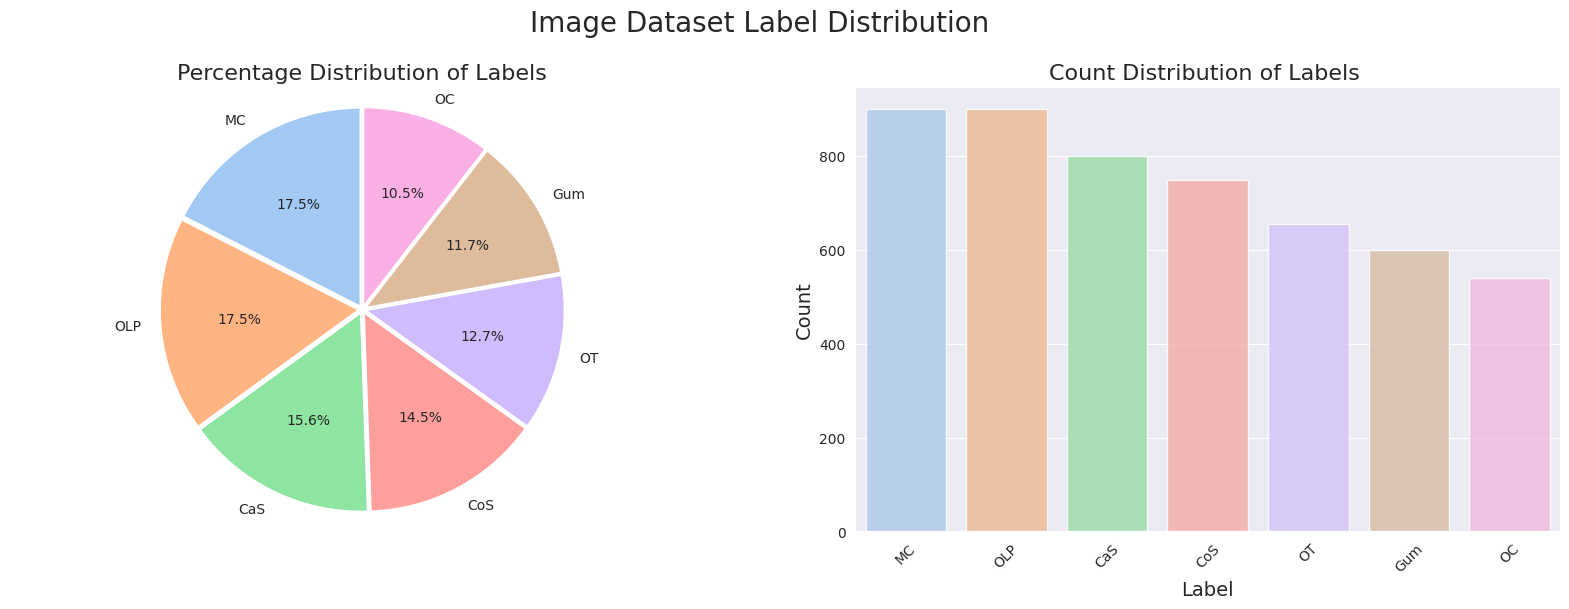

In [20]:
# Get the value counts for each label
label_counts = image_df['Label'].value_counts()

# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Define the color palette for the pie chart
colors = sns.color_palette('pastel', len(label_counts))

# Plot the pie chart with percentages, colors, and separation
explode = [0.02] * len(label_counts)  # Define separation values for each pie slice
axes[0].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
axes[0].axis('equal')  # Equal aspect ratio ensures the pie chart is circular
axes[0].set_title('Percentage Distribution of Labels', fontsize=16)

# Plot the bar chart
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='pastel', ax=axes[1])
axes[1].set_title('Count Distribution of Labels ', fontsize=16)
axes[1].set_xlabel('Label', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].set_xticklabels(label_counts.index, rotation=45)
# Add a super-title to the figure
fig.suptitle('Image Dataset Label Distribution', fontsize=20)

# Adjust the spacing between the plots and the title
fig.subplots_adjust(top=0.85)

# Display the plot
plt.show()

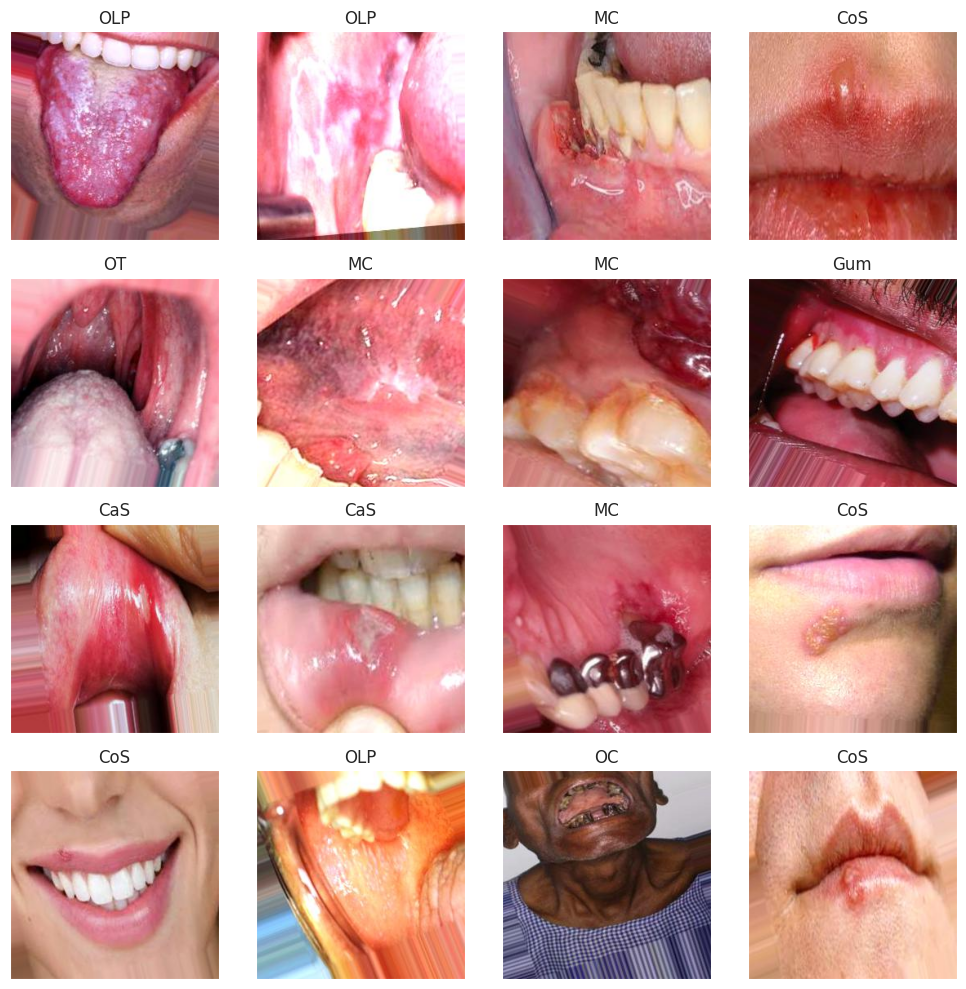

In [21]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

# Data Preprocessing

**The data will be split into three different categories: Training, Validation and Testing. The training data will be used to train the deep learning CNN model and its parameters will be fine tuned with the validation data. Finally, the performance of the data will be evaluated using the test data(data the model has not previously seen).**

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
TARGET_SIZE = (224, 224)  # Adjust size according to your model
BATCH_SIZE = 32  # Adjust batch size according to your requirements

# Initialize ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize images
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255  # Normalize images
)

test_datagen = ImageDataGenerator(
    rescale=1./255  # Normalize images
)

# Define directories
train_dir = '/kaggle/input/teeth-images-dataset/Teeth_Dataset/Training'
val_dir = '/kaggle/input/teeth-images-dataset/Teeth_Dataset/Validation'
test_dir = '/kaggle/input/teeth-images-dataset/Teeth_Dataset/Testing'

# Load training data
train_images = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

# Load validation data
val_images = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False  # Validation data is usually not shuffled
)

# Load testing data
test_images = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False  # Test data is not shuffled
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [29]:
# Apply augmentation to the dataset
import tensorflow as tf
from tensorflow.keras import layers

# Data Augmentation Step
augment = tf.keras.Sequential([
    layers.Resizing(224, 224),
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# Training the model

In [30]:
# Load the pretained model
pretrained_model = tf.keras.applications.vgg19.VGG19(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",  # watch the val loss metric
    patience=5,
    restore_best_weights=True)  # if val loss decreases for 5 epochs in a row, stop training

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-10,
    verbose=1)

# Define TensorBoard callback
tensorboard_callback = TensorBoard(
    log_dir="/kaggle/working/training_logs", 
    histogram_freq=1, 
    write_graph=True, 
    write_images=False, 
    update_freq='epoch', 
    profile_batch=2)


In [33]:
import numpy as np

# Example data preparation (adjust according to your actual data)
# Replace these with actual data loading code
train_images = np.random.rand(100, 28, 28)  # Example: 100 training images of size 28x28
train_labels = np.random.randint(0, 10, size=(100, 7))  # Example: 100 one-hot encoded labels for 10 classes

val_images = np.random.rand(20, 28, 28)  # Example: 20 validation images of size 28x28
val_labels = np.random.randint(0, 10, size=(20, 7))  # Example: 20 one-hot encoded labels for 10 classes


In [34]:
import tensorflow as tf
from tensorflow.keras import layers

# Data Augmentation Step
augment = tf.keras.Sequential([
    layers.Resizing(224, 224),
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])


In [35]:
print("train_images shape:", train_images.shape)
print("train_labels shape:", train_labels.shape)
print("val_images shape:", val_images.shape)
print("val_labels shape:", val_labels.shape)


train_images shape: (100, 28, 28)
train_labels shape: (100, 7)
val_images shape: (20, 28, 28)
val_labels shape: (20, 7)


In [36]:
import numpy as np

# Example: Assuming train_labels contains the labels for your dataset
num_classes = len(np.unique(train_labels))

# Now define your model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Adjust input shape according to your data
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Use the defined num_classes
])


# Dataframes

In [37]:
import os
import pandas as pd

def create_dataframe_from_directory(directory, class_names):
    data = []
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                data.append([os.path.join(class_dir, filename), class_name])
    return pd.DataFrame(data, columns=['Filepath', 'Label'])

# Define class names (adjust these based on your dataset)
class_names = ['OC', 'CaS', 'OT', 'CoS', 'Gum', 'MC', 'OLP']  # Update with your actual class names

# Create DataFrames
train_df = create_dataframe_from_directory(train_dir, class_names)
val_df = create_dataframe_from_directory(val_dir, class_names)
test_df = create_dataframe_from_directory(test_dir, class_names)


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Define constants
TARGET_SIZE = (224, 224)
BATCH_SIZE = 32

# Initialize ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Adjust validation split if necessary
)

# Assuming train_df and val_df are DataFrames with correct paths and labels
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training',
    seed=42
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False,
    subset='validation',
    seed=42
)


Found 2470 validated image filenames belonging to 7 classes.
Found 205 validated image filenames belonging to 7 classes.


# Training the model

In [40]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input

# Load a pre-trained model (e.g., VGG16) as the base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model
base_model.trainable = False

# Create new model on top
inputs = Input(shape=(128, 128, 3))  # Adjust shape as needed
x = base_model(inputs, training=False)  # Use base model with inputs
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)  # Adjust number of classes as needed

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Now you can proceed with model training


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [42]:
# Freeze the base_model
base_model.trainable = False

# inputs = keras.Input(shape=(96, 96, 1))
inputs = keras.Input(shape=(128, 128, 1))
x = keras.layers.Conv2D(3, (3, 3), padding='same')(inputs)


# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
# scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(17)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 3)    │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 17)             │         8,721 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,723,439 (56.17 MB)

 Trainable params: 8,751 (34.18 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [43]:
inputs

<KerasTensor shape=(None, 128, 128, 1), dtype=float32, sparse=None, name=keras_tensor_81>

In [44]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
TARGET_SIZE = (224, 224)  # Input image size
BATCH_SIZE = 32  # Batch size
NUM_CLASSES = 7  # Number of classes in your dataset
EPOCHS = 20  # Number of epochs

# Initialize ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Adjust validation split if necessary
)

# Load training and validation data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,  # Make sure you have a DataFrame with your data paths and labels
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training',
    seed=42
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='validation',
    seed=42
)

# Define the model architecture with ~200,000 parameters
inputs = Input(shape=(224, 224, 3))

x = Conv2D(8, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)  # Reduced the dense layer size
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)  # Ensure this matches the number of classes

model = Model(inputs=inputs, outputs=outputs)

# Print model summary
model.summary()

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define the file path for saving the weights
checkpoint_path = "/kaggle/working/teeth_classification_model_checkpoint.weights.h5"

# Create callbacks
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor="val_accuracy",
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-10,
    verbose=1
)

tensorboard_callback = TensorBoard(
    log_dir="/kaggle/working/training_logs",
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    update_freq='epoch'
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[
        early_stopping,
        checkpoint_callback,
        reduce_lr,
        tensorboard_callback
    ]
)


Found 2470 validated image filenames belonging to 7 classes.
Found 617 validated image filenames belonging to 7 classes.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,612,407 (6.15 MB)

 Trainable params: 1,612,295 (6.15 MB)

 Non-trainable params: 112 (448.00 B)

Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 950ms/step - accuracy: 0.2110 - loss: 2.9635
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to /kaggle/working/teeth_classification_model_checkpoint.weights.h5
78/78 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.2112 - loss: 2.9553 - val_accuracy: 0.0000e+00 - val_loss: 4.5623 - learning_rate: 0.0010
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.2201 - loss: 1.9107
Epoch 2: val_accuracy did not improve from 0.00000
78/78 ━━━━━━━━━━━━━━━━━━━━ 79s 968ms/step - accuracy: 0.2202 - loss: 1.9106 - val_accuracy: 0.0000e+00 - val_loss: 5.4901 - learning_rate: 0.0010
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.2358 - loss: 1.9023
Epoch 3: val_accuracy did not improve from 0.00000
78/78 ━━━━━━━━━━━━━━━━━━━━ 78s 957ms/step - accuracy: 0.2357 - loss: 1.9021 - val_accuracy: 0.0000e+00 - val_loss: 5.8712 - learning_rate: 0.0010
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.2287 

In [45]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 1.93512
Test Accuracy: 18.39%


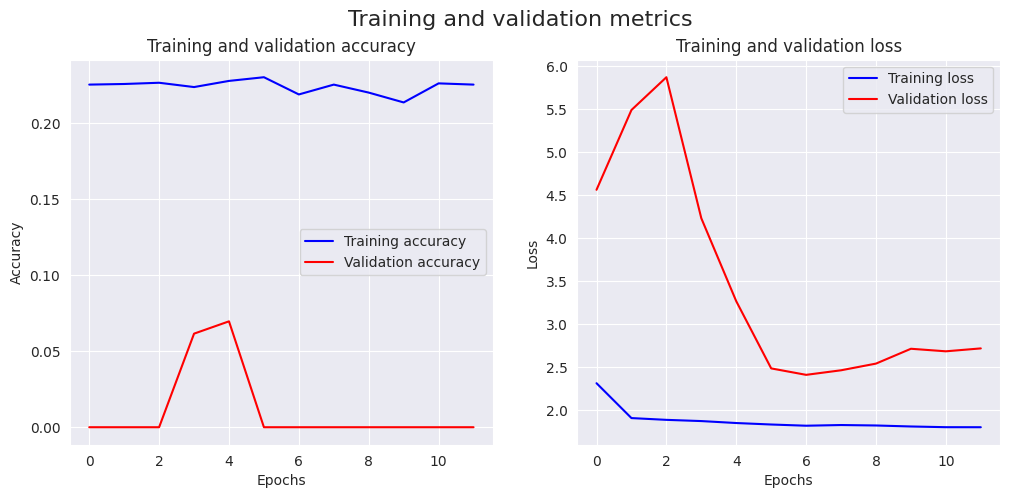

In [46]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(epochs, accuracy, 'b', label='Training accuracy')
ax1.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b', label='Training loss')
ax2.plot(epochs, val_loss, 'r', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

fig.suptitle('Training and validation metrics', fontsize=16)
plt.show()

In [49]:
# Assuming `model` is your trained model and `test_images` is your dataset
predictions = model.predict(test_images)
pred = np.argmax(predictions, axis=1)  # For classification, get the index of the highest probability


33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step


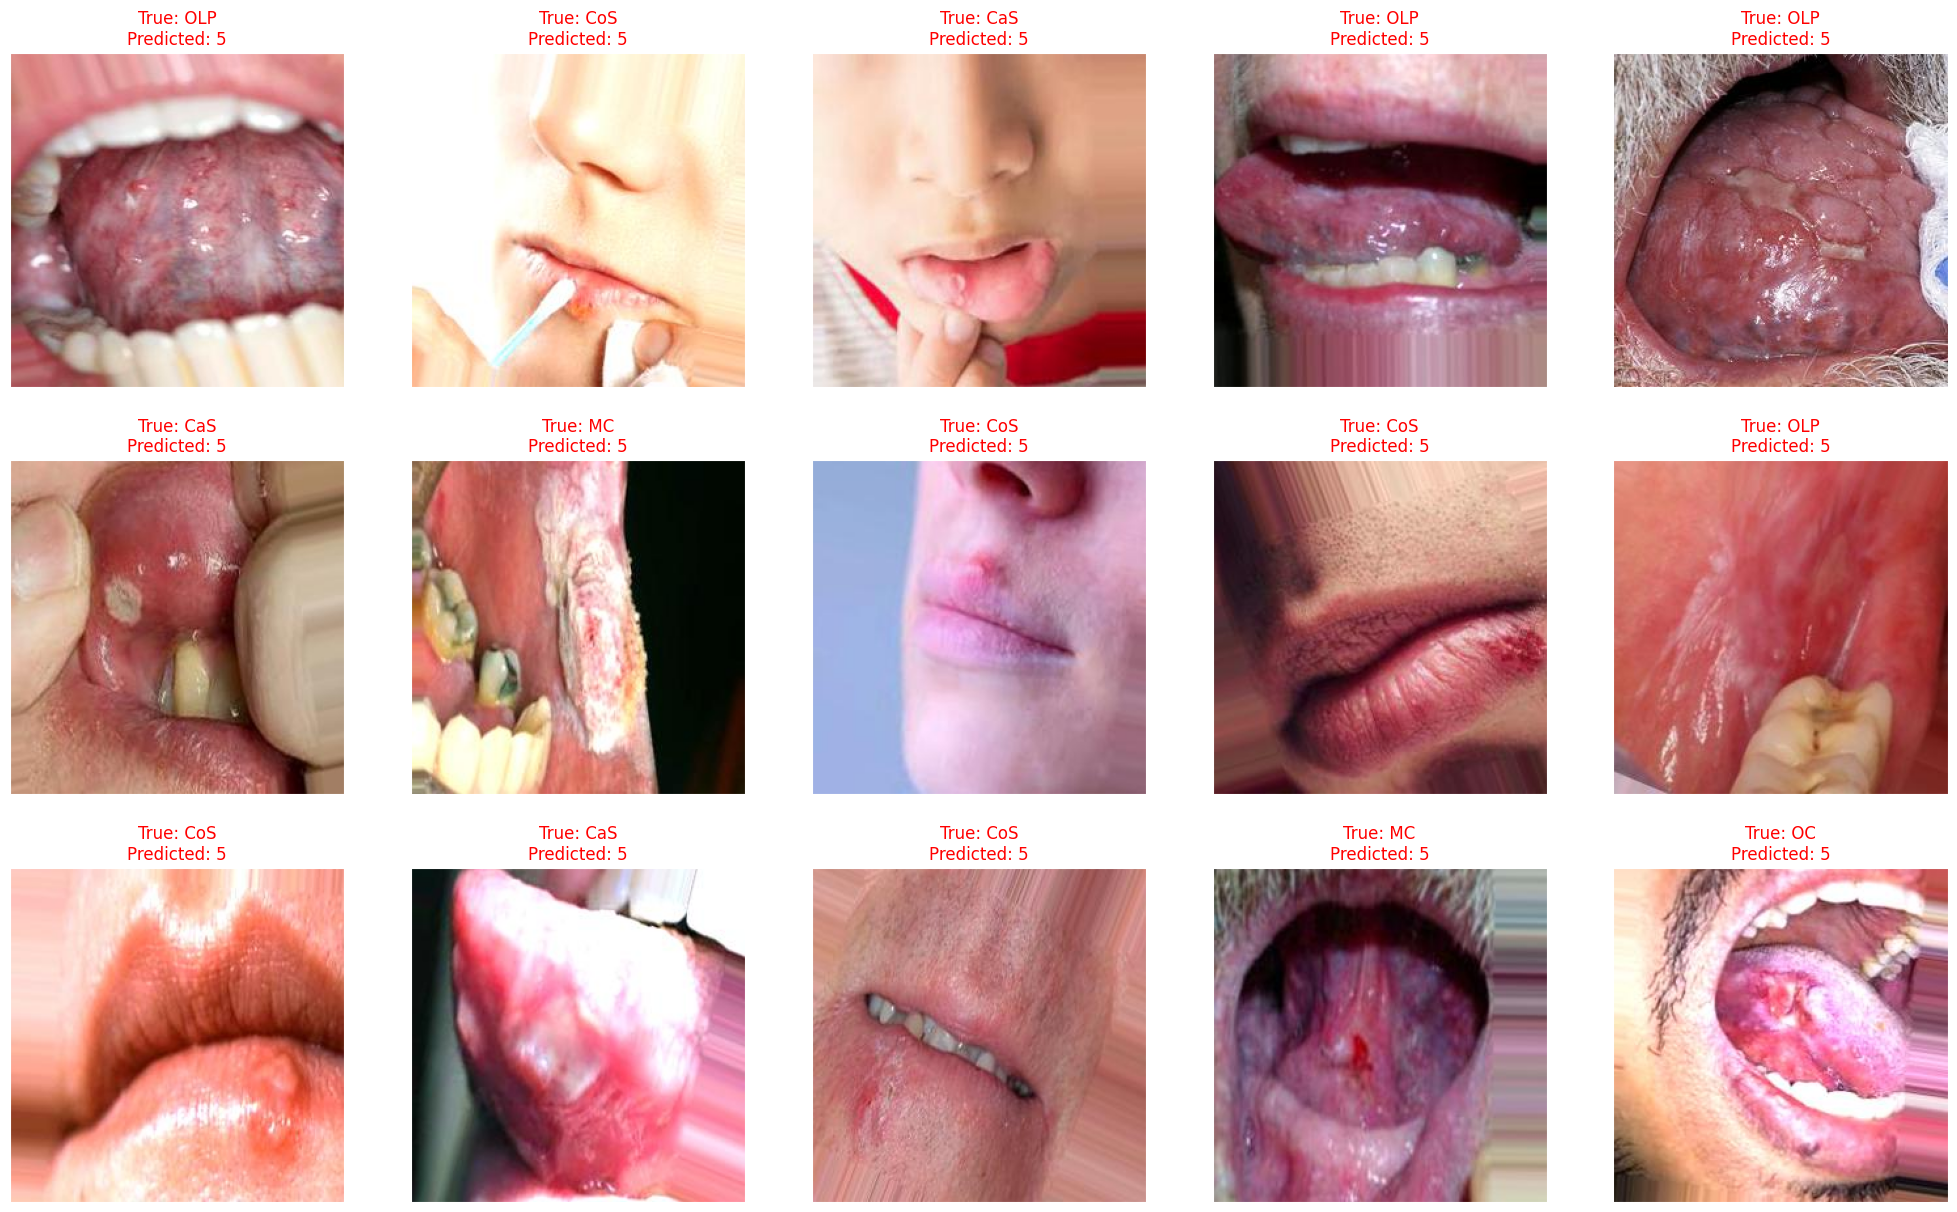

<Figure size 640x480 with 0 Axes>

In [50]:
  # Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()